**Titanic is one of the most big disaster in the history in 1912. It sank after hitting the iceberg. 2224 passengers and employees are died.**

In [622]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import os
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [623]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
test_PassengerID=test_df['PassengerId']

In [624]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000000000000,0,0,211536,13.000000000000000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000000000000,0,0,112053,30.000000000000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,nan,1,2,W./C. 6607,23.449999999999999,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000000000000,0,0,111369,30.000000000000000,C148,C


In [625]:
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,NaN,S
1,2,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C85,C
2,3,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,NaN,S
3,4,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,C123,S
4,5,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,nan,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.050000000000001,NaN,S
1305,1306,nan,1,"Oliva y Ocana, Dona. Fermina",female,39.000000000000000,0,0,PC 17758,108.900000000000006,C105,C
1306,1307,nan,3,"Saether, Mr. Simon Sivertsen",male,38.500000000000000,0,0,SOTON/O.Q. 3101262,7.250000000000000,NaN,S
1307,1308,nan,3,"Ware, Mr. Frederick",male,nan,0,0,359309,8.050000000000001,NaN,S


In [626]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

=>>> There are total 12 columns.

In [627]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,A/5 21171,7.250000000000000,NaN,S
1,2,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,PC 17599,71.283299999999997,C85,C
2,3,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,STON/O2. 3101282,7.925000000000000,NaN,S
3,4,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,113803,53.100000000000001,C123,S
4,5,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,373450,8.050000000000001,NaN,S


In [628]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,nan,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.050000000000001,NaN,S
1305,1306,nan,1,"Oliva y Ocana, Dona. Fermina",female,39.000000000000000,0,0,PC 17758,108.900000000000006,C105,C
1306,1307,nan,3,"Saether, Mr. Simon Sivertsen",male,38.500000000000000,0,0,SOTON/O.Q. 3101262,7.250000000000000,NaN,S
1307,1308,nan,3,"Ware, Mr. Frederick",male,nan,0,0,359309,8.050000000000001,NaN,S
1308,1309,nan,3,"Peter, Master. Michael J",male,nan,1,1,2668,22.358300000000000,NaN,C


In [629]:
train_df.isnull().sum()*100/train_df.shape[0]

PassengerId    0.000000000000000
Survived      31.932773109243698
Pclass         0.000000000000000
Name           0.000000000000000
Sex            0.000000000000000
Age           20.091673032849503
SibSp          0.000000000000000
Parch          0.000000000000000
Ticket         0.000000000000000
Fare           0.076394194041253
Cabin         77.463712757830407
Embarked       0.152788388082506
dtype: float64

=>>> We can drop PassengerId, because it is not necessary values.
Cabin column has %77null ratio. So we can drop this column.
Than ticket column is not useful data for dataset.

In [630]:
train_df.drop(labels = ["PassengerId", "Ticket", "Cabin"], axis = 1, inplace = True)

In [631]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

=>>> There are 9 columns, now.

In [632]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,7.250000000000000,S
1,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,71.283299999999997,C
2,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,7.925000000000000,S
3,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,53.100000000000001,S
4,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,8.050000000000001,S


In [633]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000000000000,1309.000000000000000,1046.000000000000000,1309.000000000000000,1309.000000000000000,1308.000000000000000
mean,0.383838383838384,2.294881588999236,29.881137667304014,0.498854087089381,0.385026737967914,33.295479281345600
std,0.486592454264858,0.837836018970132,14.413493211271334,1.041658390596098,0.865560275349513,51.758668239174142
min,0.000000000000000,1.000000000000000,0.170000000000000,0.000000000000000,0.000000000000000,0.000000000000000
25%,0.000000000000000,2.000000000000000,21.000000000000000,0.000000000000000,0.000000000000000,7.895800000000000
50%,0.000000000000000,3.000000000000000,28.000000000000000,0.000000000000000,0.000000000000000,14.454200000000000
75%,1.000000000000000,3.000000000000000,39.000000000000000,1.000000000000000,0.000000000000000,31.274999999999999
max,1.000000000000000,3.000000000000000,80.000000000000000,8.000000000000000,9.000000000000000,512.329200000000014


=>>> mean and %50 value of Age are so similar. There is no skewed distribution.

=>>> mean and %50 value of Pclass are a little similar.

=>>> mean and %50 value of Fare are not so similar. There is a skewed distribution.

In [634]:
# show the overall survival rate, as the standard when choosing the fts
print('Overall Survival Ratio: %{}'.format(train_df['Survived'].mean()*100))

Overall Survival Ratio: %38.38383838383838


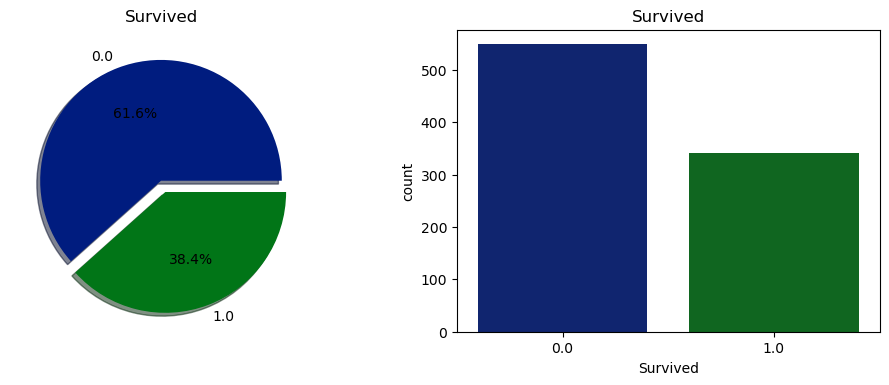

In [635]:
f,ax=plt.subplots(1,2,figsize=(12,4))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

% 38,4 of passengers are survived, % 61,6 of passengers died.

In [636]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Fare      1308 non-null   float64
 8   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 92.2+ KB


=>>> Dataset has 3 float64, 3 int64, 3 object column dtype.

float64 : Fare and Age

int64: Pclass, SibSp, Parch, PassengerID, and Survived

object : Name, Sex, and Embarked

Survived, Age, Fare, Embarked  columns have missing values.

In [637]:
train_df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

We have 148 Null Survived,

263 Age,

1 Fare,

2 Embarked values.

=>>> For dividing categorical and numerical values:

In [638]:
train_df.nunique()

Survived       2
Pclass         3
Name        1307
Sex            2
Age           98
SibSp          7
Parch          8
Fare         281
Embarked       3
dtype: int64

**Categorical Variable Analysis** : Survived, Pclass, Sex, SibsSp, Parch, Embarked, Name

**Numerical Variable Analysis** : Age, Fare

**Categorical Variable Analysis- Visualize**

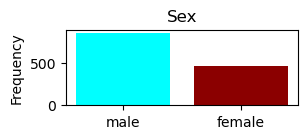

Sex: 
 male      843
female    466
Name: Sex, dtype: int64


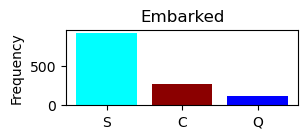

Embarked: 
 S    914
C    270
Q    123
Name: Embarked, dtype: int64


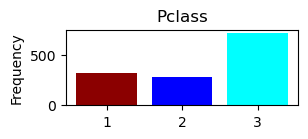

Pclass: 
 3    709
1    323
2    277
Name: Pclass, dtype: int64


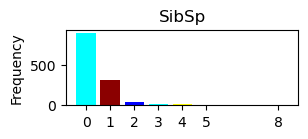

SibSp: 
 0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


In [639]:
def bar_plot(i):
    var= train_df[i]
    varValue=var.value_counts()
    plt.figure(figsize=(3,1))
    plt.bar(varValue.index, varValue, color=["cyan", "darkred", "blue", "yellow"])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()
    print('{}: \n {}'.format(i,varValue))
Firstcategory=[ 'Sex', 'Embarked', 'Pclass', 'SibSp']
for c in Firstcategory:
    bar_plot(c)

**Numerical Variable Analysis - Visualize**

Text(0.5, 1.0, 'Age')

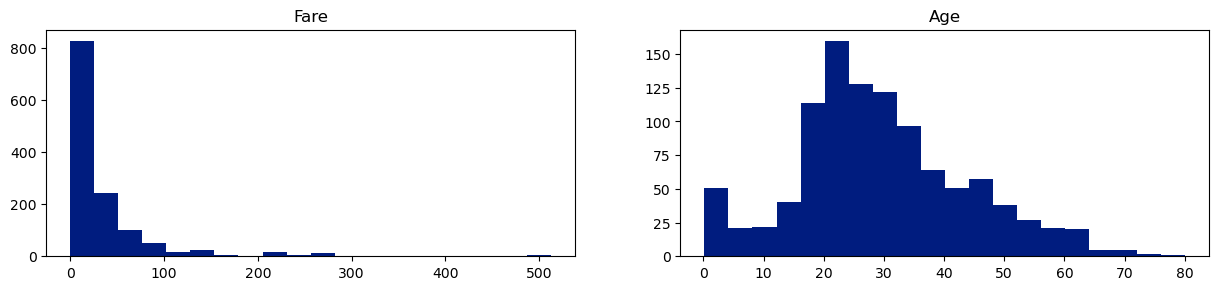

In [640]:
plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
plt.hist(train_df['Fare'], bins=20)
plt.title("Fare")
plt.subplot(1,2,2)
plt.hist(train_df['Age'], bins=20)
plt.title("Age")

=>>> Age likes positively skewed

In [641]:
#Pclass vs Survived
print(train_df[['Pclass', 'Survived']].head(10))
print("Survived people ratio groupby Pclass: \n", train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass          Survived
0       3 0.000000000000000
1       1 1.000000000000000
2       3 1.000000000000000
3       1 1.000000000000000
4       3 0.000000000000000
5       3 0.000000000000000
6       1 0.000000000000000
7       3 0.000000000000000
8       3 1.000000000000000
9       2 1.000000000000000
Survived people ratio groupby Pclass: 
    Pclass          Survived
0       1 0.629629629629630
1       2 0.472826086956522
2       3 0.242362525458248


=>>> Ratio of survived passenger is the most value in 1.pclass.

In [642]:
#Survived people ratio groupby Sex:
print(train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

      Sex          Survived
0  female 0.742038216560510
1    male 0.188908145580589


=>>> Number of survived female passengers are more than survived male passenger.

In [643]:
#Survived people ratio groupby Siblings/Spouse :
sursibsp=train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sursibsp

,SibSp,Survived
1,1,0.535885167464115
2,2,0.464285714285714
0,0,0.345394736842105
3,3,0.250000000000000
4,4,0.166666666666667
5,5,0.000000000000000
6,8,0.000000000000000


=>>> Passengers who have 1 sibling/suppose have the most value of survived rate. Passengers that have 5 or 8 sibsp are not survived or there is no possibility of having sibsp.

In [644]:
#Survived people ratio groupby Parch ( Parent or children) : 
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000000000000
1,1,0.550847457627119
2,2,0.500000000000000
0,0,0.343657817109145
5,5,0.200000000000000
4,4,0.000000000000000
6,6,0.000000000000000
7,9,nan


=>>> If a passenger has 3 children or parents, the survived rate is highest.

#**Outlier Detection**

**MISSING VALUES**

**Find and fill the missing value:**

In [645]:
#Finding missing values:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Embarked'], dtype='object')

In [646]:
train_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000000000000,-0.338481035961016,-0.077221094572177,-0.035322498885736,0.081629407083482,0.257306522384962
Pclass,-0.338481035961016,1.000000000000000,-0.408106234236445,0.060832007574908,0.018322202009787,-0.558628732327172
Age,-0.077221094572177,-0.408106234236445,1.000000000000000,-0.243698997664770,-0.150917090363543,0.178739855999641
SibSp,-0.035322498885736,0.060832007574908,-0.243698997664770,1.000000000000000,0.373587190626489,0.160238255914952
Parch,0.081629407083482,0.018322202009787,-0.150917090363543,0.373587190626489,1.000000000000000,0.221538658548192
Fare,0.257306522384962,-0.558628732327172,0.178739855999641,0.160238255914952,0.221538658548192,1.000000000000000


# Embarked missing values

In [647]:
#Embarked missing
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1.000000000000000,1,"Icard, Miss. Amelie",female,38.000000000000000,0,0,80.000000000000000,NaN
829,1.000000000000000,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000000000000000,0,0,80.000000000000000,NaN


<Figure size 1500x500 with 0 Axes>

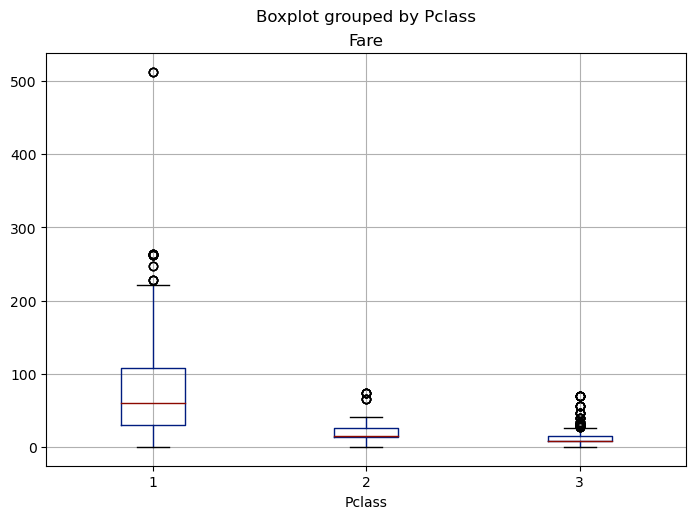

In [648]:
plt.figure(figsize=(15,5))
train_df.boxplot(column='Fare', by='Pclass')
plt.show()

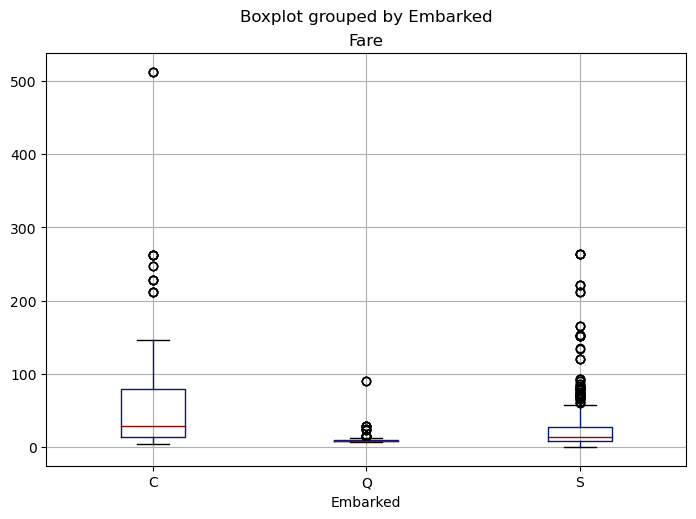

In [649]:
train_df.boxplot(column='Fare', by='Embarked')
plt.show()

=>>> C embarked has highest fare and so 1 pclass. So, null is filled by "C".

In [650]:
train_df['Embarked']= train_df['Embarked'].fillna('C')
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


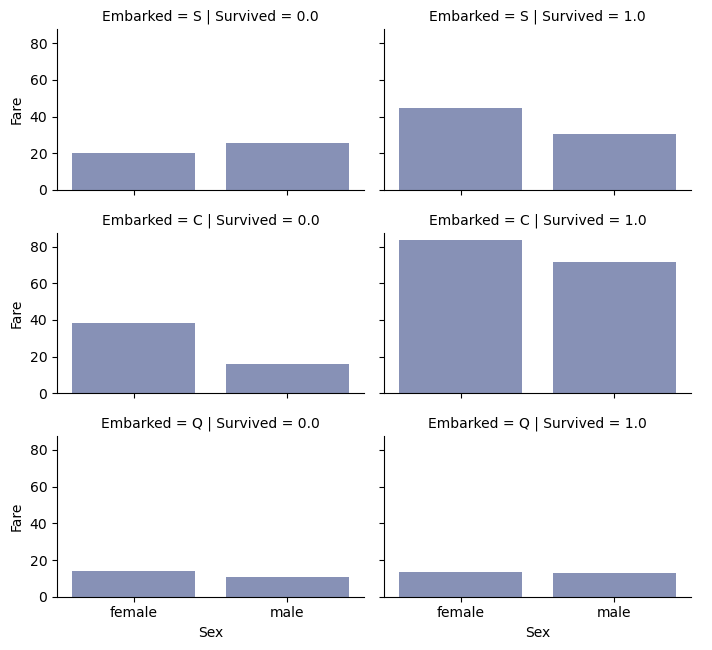

In [651]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Fare missing values

In [652]:
#Fare missing
train_df[train_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1043,nan,3,"Storey, Mr. Thomas",male,60.500000000000000,0,0,nan,S


=>>> Only one null value of Fare have 3.Pclass. So it is filled mean of Fare of 3.Pclass.

In [653]:
train_df['Fare']= train_df['Fare'].fillna(np.mean(train_df[train_df['Pclass']==3]['Fare']))
train_df[train_df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [654]:
print('Highest Fare was:',train_df['Fare'].max())
print('Lowest Fare was:',train_df['Fare'].min())
print('Average Fare was:',train_df['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.28020610290345


# Sex get.dummies

We can use get.dummies method for Sex column

In [655]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Sex"])], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,0.000000000000000,3,"Braund, Mr. Owen Harris",male,22.000000000000000,1,0,7.250000000000000,S,0,1
1,1.000000000000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000000000000,1,0,71.283299999999997,C,1,0
2,1.000000000000000,3,"Heikkinen, Miss. Laina",female,26.000000000000000,0,0,7.925000000000000,S,1,0
3,1.000000000000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000000000000,1,0,53.100000000000001,S,1,0
4,0.000000000000000,3,"Allen, Mr. William Henry",male,35.000000000000000,0,0,8.050000000000001,S,0,1


In [656]:
train_df.drop(labels = ["Sex"], axis = 1, inplace = True)

# Age missing values

In [657]:
#Age missing
train_df[train_df['Age'].isnull()]

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female,male
5,0.000000000000000,3,"Moran, Mr. James",nan,0,0,8.458299999999999,Q,0,1
17,1.000000000000000,2,"Williams, Mr. Charles Eugene",nan,0,0,13.000000000000000,S,0,1
19,1.000000000000000,3,"Masselmani, Mrs. Fatima",nan,0,0,7.225000000000000,C,1,0
26,0.000000000000000,3,"Emir, Mr. Farred Chehab",nan,0,0,7.225000000000000,C,0,1
28,1.000000000000000,3,"O'Dwyer, Miss. Ellen ""Nellie""",nan,0,0,7.879200000000000,Q,1,0
...,...,...,...,...,...,...,...,...,...,...
1299,nan,3,"Riordan, Miss. Johanna Hannah""""",nan,0,0,7.720800000000000,Q,1,0
1301,nan,3,"Naughton, Miss. Hannah",nan,0,0,7.750000000000000,Q,1,0
1304,nan,3,"Spector, Mr. Woolf",nan,0,0,8.050000000000001,S,0,1
1307,nan,3,"Ware, Mr. Frederick",nan,0,0,8.050000000000001,S,0,1


=>>> We can fill age with mean value of groupby Embarked and female columns.

In [658]:
train_df['Age'] = train_df['Age'].groupby([train_df['Embarked'], train_df['female']]).apply(lambda x: x.fillna(x.mean()))

In [659]:
train_df.Age.isnull().sum()

0

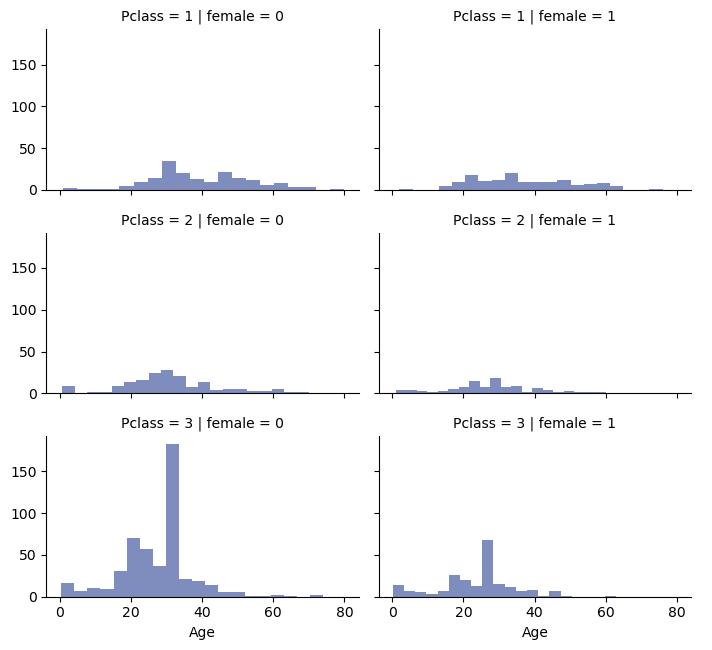

In [660]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='female', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# Pclass get dummies

In [661]:
train_df= pd.concat([train_df, pd.get_dummies(train_df["Pclass"])], axis=1)

In [662]:
train_df.drop(labels = ["Pclass"], axis = 1, inplace = True)
train_df.head()

,Survived,Name,Age,SibSp,Parch,Fare,Embarked,female,male,1,2,3
0,0.000000000000000,"Braund, Mr. Owen Harris",22.000000000000000,1,0,7.250000000000000,S,0,1,0,0,1
1,1.000000000000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,1,0,71.283299999999997,C,1,0,1,0,0
2,1.000000000000000,"Heikkinen, Miss. Laina",26.000000000000000,0,0,7.925000000000000,S,1,0,0,0,1
3,1.000000000000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,1,0,53.100000000000001,S,1,0,1,0,0
4,0.000000000000000,"Allen, Mr. William Henry",35.000000000000000,0,0,8.050000000000001,S,0,1,0,0,1


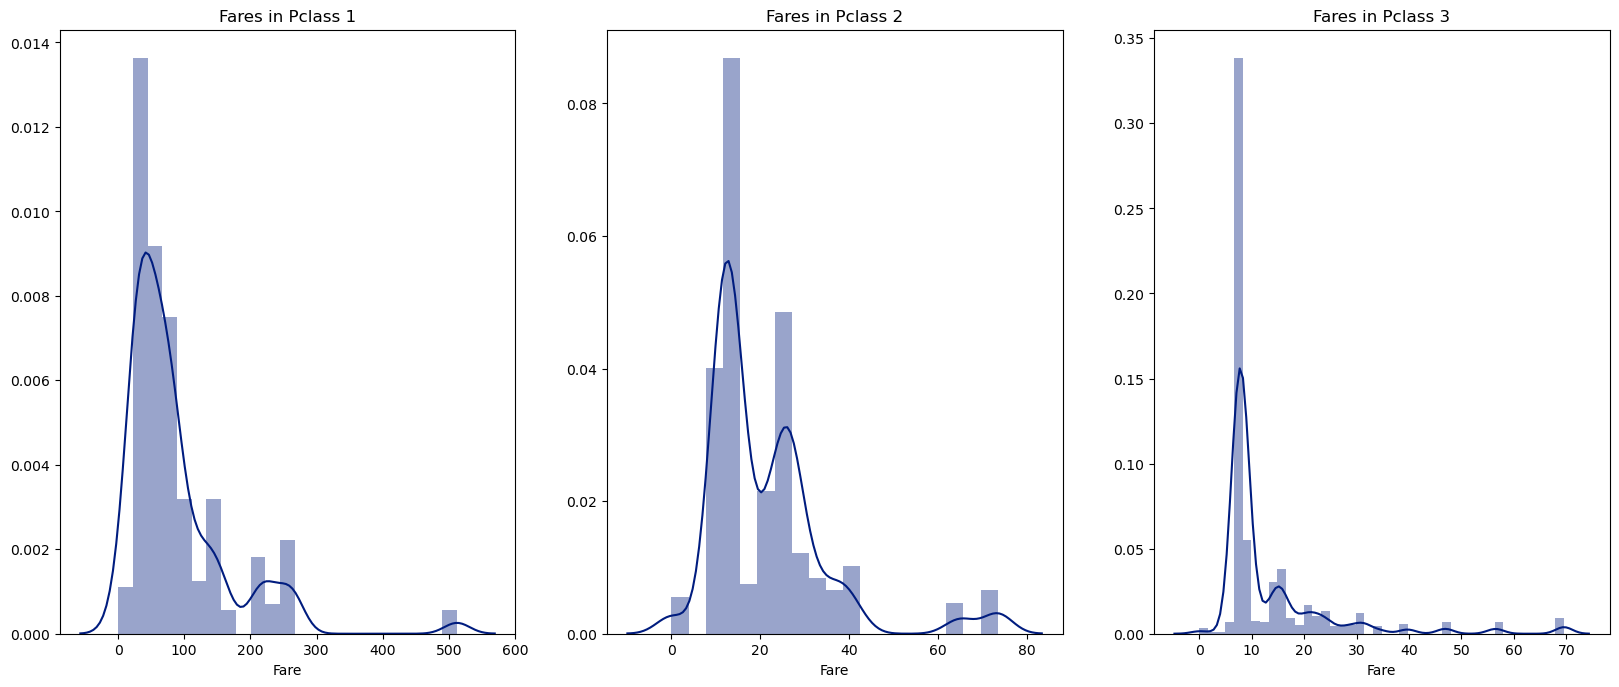

In [663]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_df[train_df[1]==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_df[train_df[2]==1].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train_df[train_df[3]==1].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

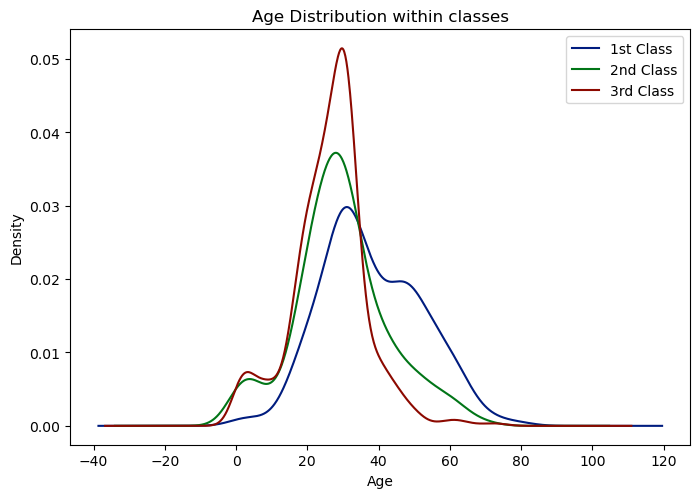

In [664]:
train_df.Age[train_df[1] == 1].plot(kind='kde')    
train_df.Age[train_df[2] == 1].plot(kind='kde')
train_df.Age[train_df[3] == 1].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

# Creating new column as **Alone**, with SibSp column:

In [665]:
def make_discrete(SibSp):
    if SibSp < 1:
        return 1
    else:
        return 0
train_df['alone'] = train_df['SibSp'].apply(make_discrete)
train_df.groupby("alone")["SibSp"].count()

alone
0    418
1    891
Name: SibSp, dtype: int64

=>>> 891 people are alone.

So, we can drop SibSp column.

In [666]:
train_df.drop(labels = ["SibSp"], axis = 1, inplace = True)
train_df.head()

,Survived,Name,Age,Parch,Fare,Embarked,female,male,1,2,3,alone
0,0.000000000000000,"Braund, Mr. Owen Harris",22.000000000000000,0,7.250000000000000,S,0,1,0,0,1,0
1,1.000000000000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000000000000,0,71.283299999999997,C,1,0,1,0,0,0
2,1.000000000000000,"Heikkinen, Miss. Laina",26.000000000000000,0,7.925000000000000,S,1,0,0,0,1,1
3,1.000000000000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000000000000,0,53.100000000000001,S,1,0,1,0,0,0
4,0.000000000000000,"Allen, Mr. William Henry",35.000000000000000,0,8.050000000000001,S,0,1,0,0,1,1


# Modifying Name column as **Miss,Mrs, and Others prefix.**

In [667]:
train_df["Name"].replace(to_replace='(.*, )|(\\..*)', value='', inplace=True, regex=True)

In [668]:
train_df["Name"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [669]:
other_titles = ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Master']
train_df.replace(other_titles, "Others", inplace=True)
train_df.replace(["Mlle","Ms", "Mme"], ["Miss", "Miss", "Mrs"], inplace=True)

In [670]:
train_df

,Survived,Name,Age,Parch,Fare,Embarked,female,male,1,2,3,alone
0,0.000000000000000,Mr,22.000000000000000,0,7.250000000000000,S,0,1,0,0,1,0
1,1.000000000000000,Mrs,38.000000000000000,0,71.283299999999997,C,1,0,1,0,0,0
2,1.000000000000000,Miss,26.000000000000000,0,7.925000000000000,S,1,0,0,0,1,1
3,1.000000000000000,Mrs,35.000000000000000,0,53.100000000000001,S,1,0,1,0,0,0
4,0.000000000000000,Mr,35.000000000000000,0,8.050000000000001,S,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,nan,Mr,29.942393822393822,0,8.050000000000001,S,0,1,0,0,1,1
1305,nan,Others,39.000000000000000,0,108.900000000000006,C,1,0,1,0,0,1
1306,nan,Mr,38.500000000000000,0,7.250000000000000,S,0,1,0,0,1,1
1307,nan,Mr,29.942393822393822,0,8.050000000000001,S,0,1,0,0,1,1


# Survived missing values

In [671]:
#Survived values missing:
train_df[train_df['Survived'].isnull()]

,Survived,Name,Age,Parch,Fare,Embarked,female,male,1,2,3,alone
891,nan,Mr,34.500000000000000,0,7.829200000000000,Q,0,1,0,0,1,1
892,nan,Mrs,47.000000000000000,0,7.000000000000000,S,1,0,0,0,1,0
893,nan,Mr,62.000000000000000,0,9.687500000000000,Q,0,1,0,1,0,1
894,nan,Mr,27.000000000000000,0,8.662500000000000,S,0,1,0,0,1,1
895,nan,Mrs,22.000000000000000,1,12.287500000000000,S,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,nan,Mr,29.942393822393822,0,8.050000000000001,S,0,1,0,0,1,1
1305,nan,Others,39.000000000000000,0,108.900000000000006,C,1,0,1,0,0,1
1306,nan,Mr,38.500000000000000,0,7.250000000000000,S,0,1,0,0,1,1
1307,nan,Mr,29.942393822393822,0,8.050000000000001,S,0,1,0,0,1,1


In [672]:
#Survived missing corralated highly with Pclass
train_df[train_df['Survived'].isnull()]

,Survived,Name,Age,Parch,Fare,Embarked,female,male,1,2,3,alone
891,nan,Mr,34.500000000000000,0,7.829200000000000,Q,0,1,0,0,1,1
892,nan,Mrs,47.000000000000000,0,7.000000000000000,S,1,0,0,0,1,0
893,nan,Mr,62.000000000000000,0,9.687500000000000,Q,0,1,0,1,0,1
894,nan,Mr,27.000000000000000,0,8.662500000000000,S,0,1,0,0,1,1
895,nan,Mrs,22.000000000000000,1,12.287500000000000,S,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,nan,Mr,29.942393822393822,0,8.050000000000001,S,0,1,0,0,1,1
1305,nan,Others,39.000000000000000,0,108.900000000000006,C,1,0,1,0,0,1
1306,nan,Mr,38.500000000000000,0,7.250000000000000,S,0,1,0,0,1,1
1307,nan,Mr,29.942393822393822,0,8.050000000000001,S,0,1,0,0,1,1


In [673]:
train_df['Survived'] = train_df['Survived'].groupby([train_df[1], train_df['female']]).apply(lambda x: x.fillna(x.median()))

In [674]:
train_df["Survived"].isnull().sum()

0

In [675]:
train_df.isnull().sum()

Survived    0
Name        0
Age         0
Parch       0
Fare        0
Embarked    0
female      0
male        0
1           0
2           0
3           0
alone       0
dtype: int64

=>>> So There is no null value anymore.

In [676]:
train_df.corr()

,Survived,Age,Parch,Fare,female,male,1,2,3,alone
Survived,1.000000000000000,-0.065925085336393,0.108919148488768,0.233784867574000,0.688370981330309,-0.688370981330309,0.234337652453748,0.048091139332497,-0.242183030654638,-0.129308081062466
Age,-0.065925085336393,1.000000000000000,-0.134110658796652,0.170358009543808,-0.081560569317778,0.081560569317778,0.363936256291095,-0.013916900475888,-0.303487019687339,0.092450821935098
Parch,0.108919148488768,-0.134110658796652,1.000000000000000,0.221640660153901,0.213125461206777,-0.213125461206777,-0.013032696181890,-0.010056955947492,0.019520705339832,-0.342895145038729
Fare,0.233784867574000,0.170358009543808,0.221640660153901,1.000000000000000,0.185692745192877,-0.185692745192877,0.600090636252050,-0.121212054773774,-0.419864184895372,-0.211956128083934
female,0.688370981330309,-0.081560569317778,0.213125461206777,0.185692745192877,1.000000000000000,-1.000000000000000,0.107370660783326,0.028862225069199,-0.116562114328948,-0.188882660218621
male,-0.688370981330309,0.081560569317778,-0.213125461206777,-0.185692745192877,-1.000000000000000,1.000000000000000,-0.107370660783326,-0.028862225069199,0.116562114328948,0.188882660218621
1,0.234337652453748,0.363936256291095,-0.013032696181890,0.600090636252050,0.107370660783326,-0.107370660783326,1.000000000000000,-0.296526041234453,-0.622171761774367,-0.083074230237102
2,0.048091139332497,-0.013916900475888,-0.010056955947492,-0.121212054773774,0.028862225069199,-0.028862225069199,-0.296526041234453,1.000000000000000,-0.563180395275560,-0.026261735125488
3,-0.242183030654638,-0.303487019687339,0.019520705339832,-0.419864184895372,-0.116562114328948,0.116562114328948,-0.622171761774367,-0.563180395275560,1.000000000000000,0.093407908900524
alone,-0.129308081062466,0.092450821935098,-0.342895145038729,-0.211956128083934,-0.188882660218621,0.188882660218621,-0.083074230237102,-0.026261735125488,0.093407908900524,1.000000000000000


# Visualize

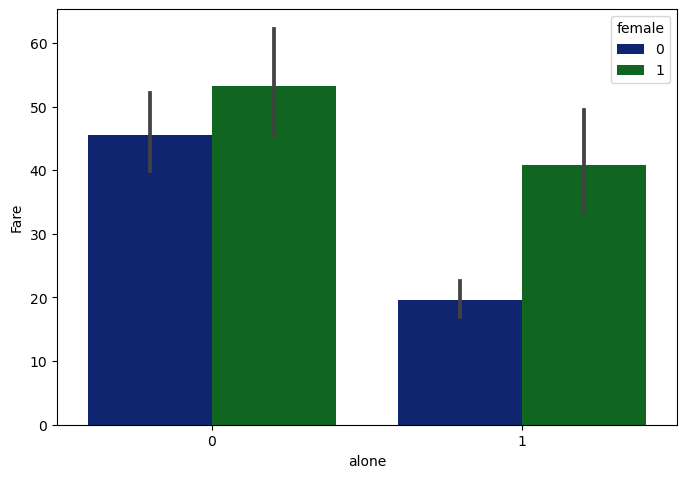

In [686]:
sns.barplot(x="alone", y="Fare", data=train_df, hue = 'female')
plt.show()

In [678]:
#plt.figure(figsize=(5,3), dpi = 300)
#sns.scatterplot(x="Age", y="Fare", data=train_df, hue = 'Sex')

In [679]:
#plt.figure(figsize=(5,3), dpi = 200)
#a = sns.scatterplot(x="Fare", y="Embarked", data=train_df)
#plt.show()

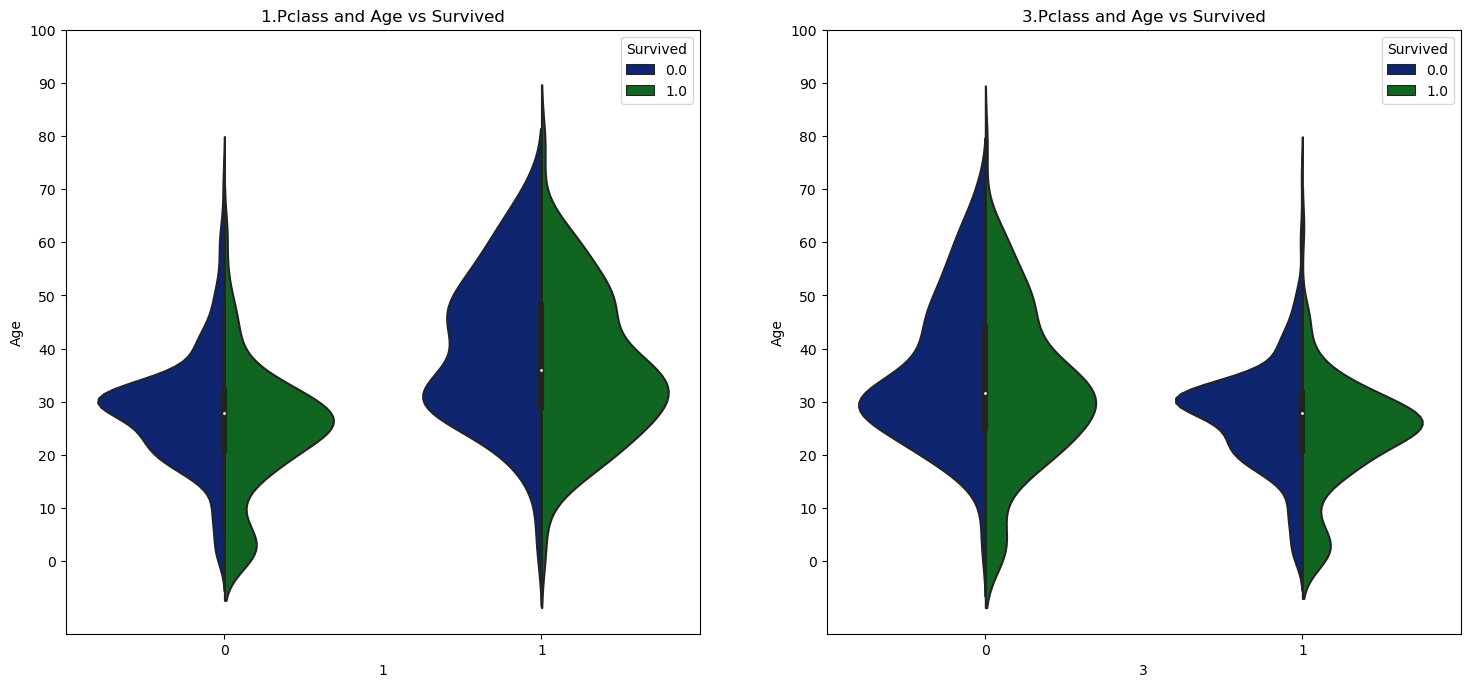

In [685]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(1,"Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('1.Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(3,"Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('3.Pclass and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

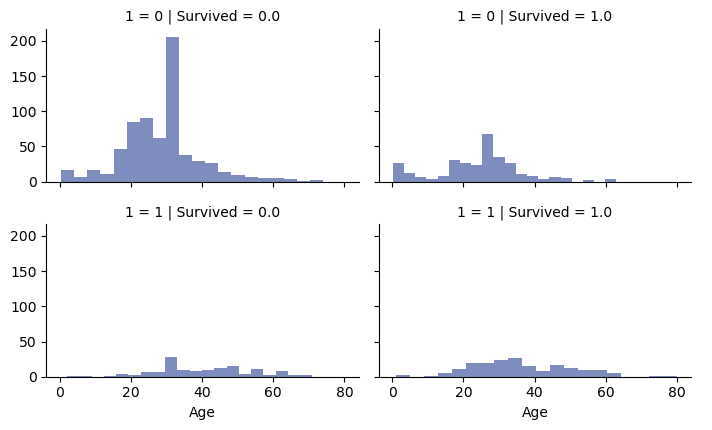

In [688]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row=1, size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**UNIVARIATE ANALYSIS**

**Visualization with Univariate Data**\
Visualization of the Numerical Variables

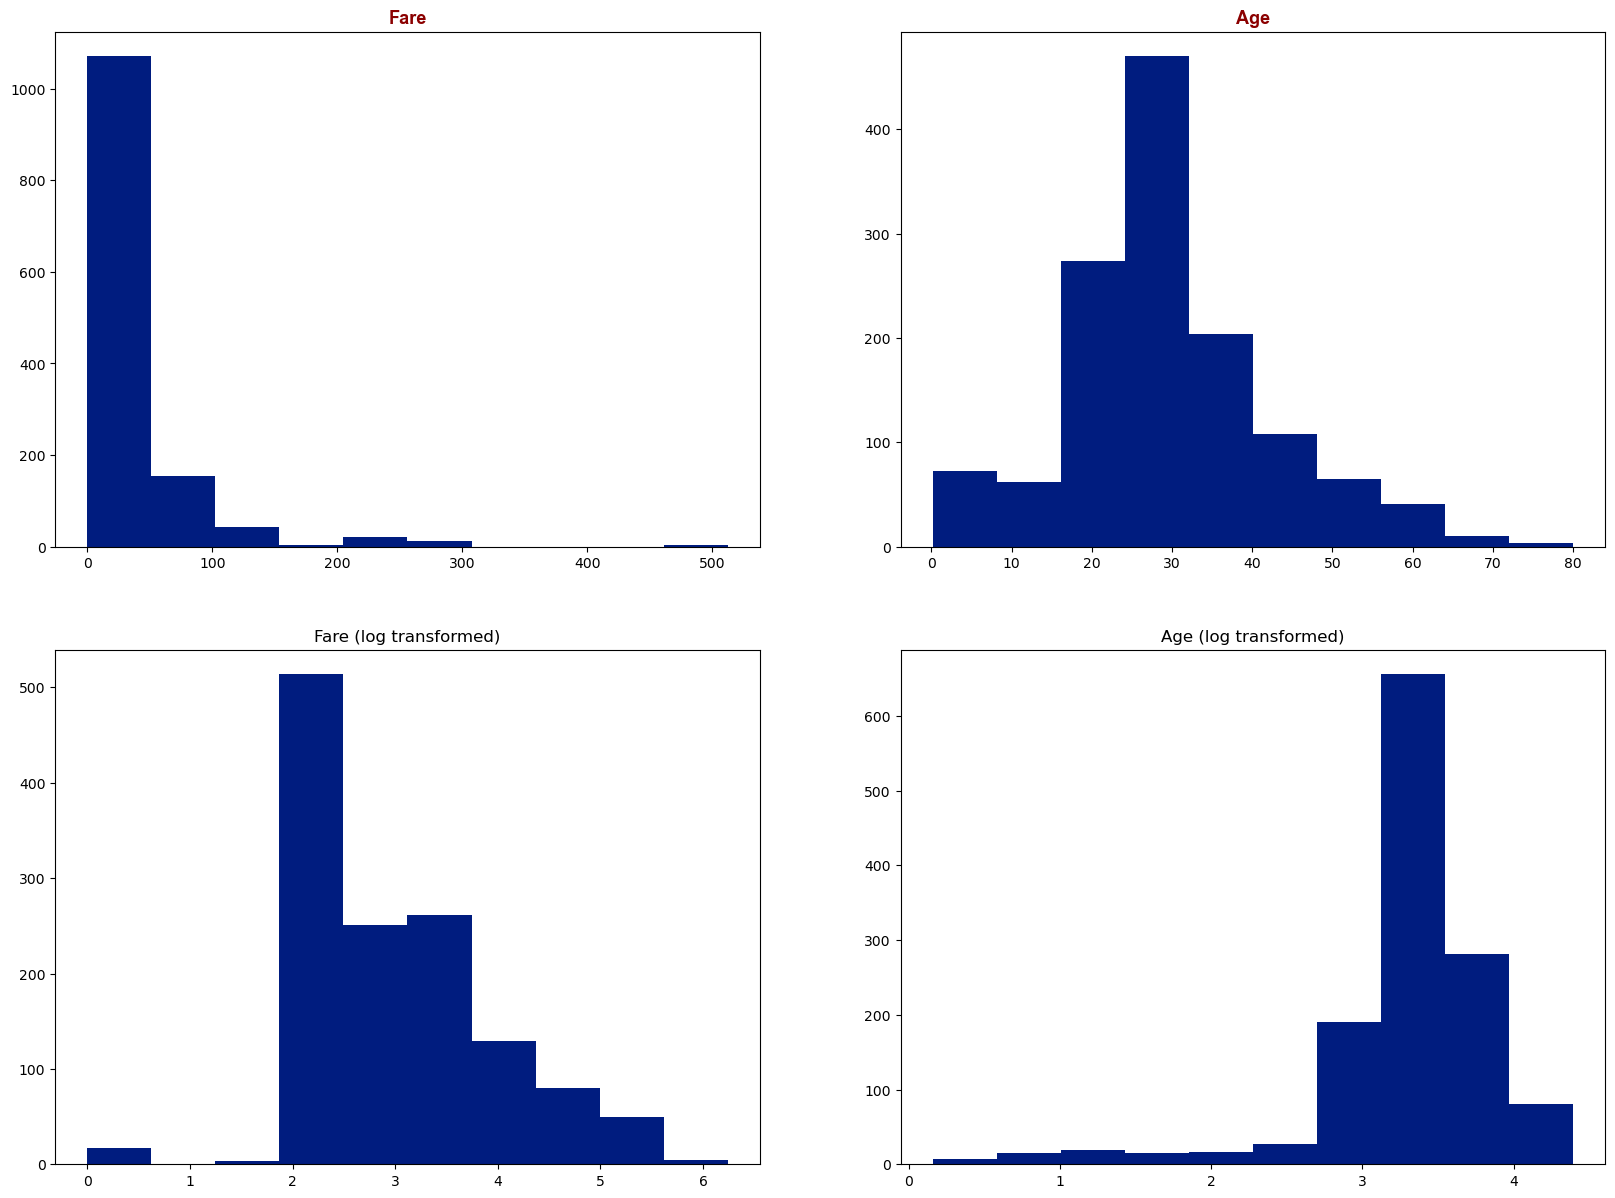

In [689]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['Fare', 'Age']
winsorize_variables= ['Fare', 'Age']
plt.figure(figsize=(20,15))
for i in range(2):
    plt.subplot(2, 2, i+1)
    plt.hist(train_df[variables[i]])
    plt.title(variables[i], fontdict=title_font)

for i in range(2):
    plt.subplot(2, 2, i+3)
    plt.hist(np.log(train_df[variables[i]]+1))
    plt.title(variables[i] + ' (log transformed)')

Visualization of the Categorical Variables

In [ ]:
#!pip install wordcloud

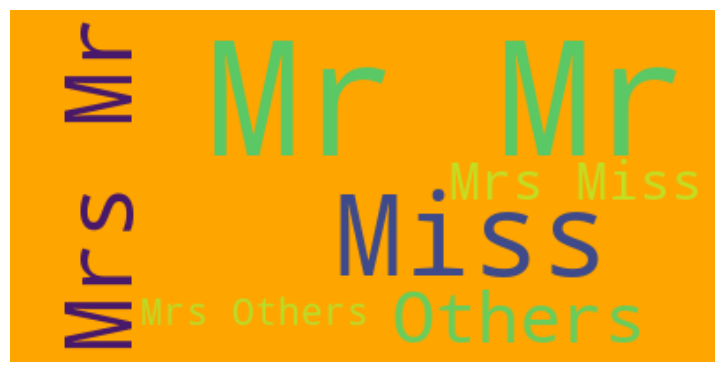

In [690]:
from wordcloud import WordCloud
categories=['Name']
plt.figure(figsize=(20,10))
for i, category in enumerate(categories):
    plt.subplot(1,2,i+1)
    wordcloud = WordCloud(background_color="orange").generate(" ".join(train_df[category].dropna()))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
plt.show()

**Bivariate Analysis of Two Continuous Variables**

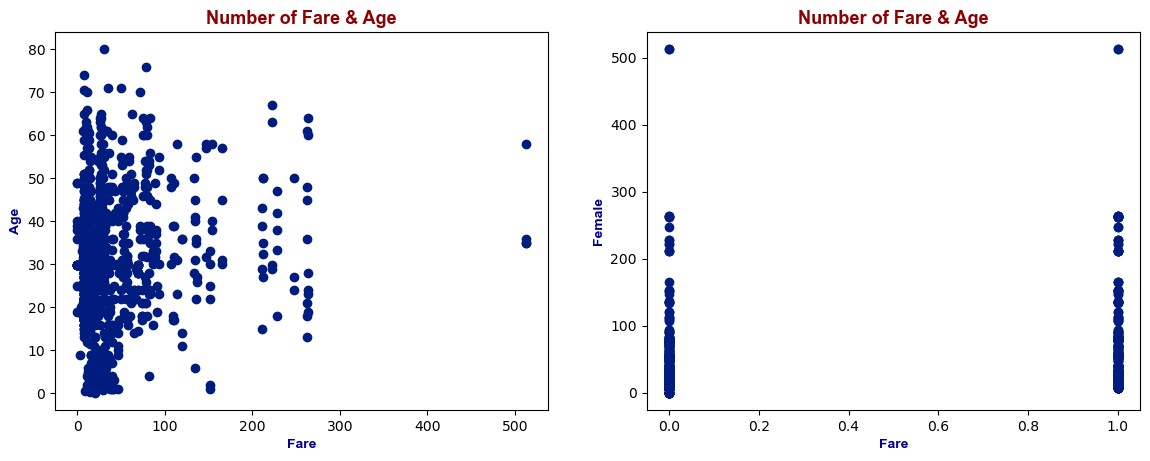

In [694]:
plt.figure(figsize=(14,5))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,2,1)
plt.scatter(train_df["Fare"], train_df["Age"])
plt.title("Number of Fare & Age", fontdict=title_font)
plt.xlabel('Fare', fontdict=axis_font )
plt.ylabel('Age', fontdict=axis_font )
plt.subplot(1,2,2)
plt.scatter(train_df["female"], train_df["Fare"])
plt.title("Number of Fare & Age", fontdict=title_font)
plt.xlabel('Fare', fontdict=axis_font )
plt.ylabel('Female', fontdict=axis_font )
plt.show()

=>>> The graphs above tells us that there is no clear pattern between the variables of interest.

**t-test**

In [699]:
train_df.dropna(inplace=True)

In [700]:
# Test whether group differences are significant.
train_dfs = train_df["Survived"].unique()
grup_train = train_df.groupby("Survived")

In [701]:
pd.options.display.float_format = '{:.15f}'.format
for var in ["Fare", "Age"]:
    comparison = pd.DataFrame(columns=['group_1', 'group_2','statistic', 'p_value'])
    print("For the sake of comparison {}".format(var),end='')
    for i in range(0, len(train_dfs)):
        for j in range(i+1, len(train_dfs)):
            ttest = stats.ttest_ind(train_df[train_df["Survived"]==train_dfs[i]][var], 
                                train_df[train_df["Survived"]==train_dfs[j]][var])
            group_1 = train_dfs[i]
            group_2 = train_dfs[j]
            statistic = ttest[0]
            p_value = ttest[1]
            
            comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statistic": statistic , 
                                                  "p_value" : p_value}, ignore_index=True)
    display(comparison)

For the sake of comparison Fare

,group_1,group_2,statistic,p_value
0,0.000000000000000,1.000000000000000,-8.692788405640398,0.000000000000000


For the sake of comparison Age

,group_1,group_2,statistic,p_value
0,0.000000000000000,1.000000000000000,2.388549788838150,0.017056237393311


**Correlation Coefficient**

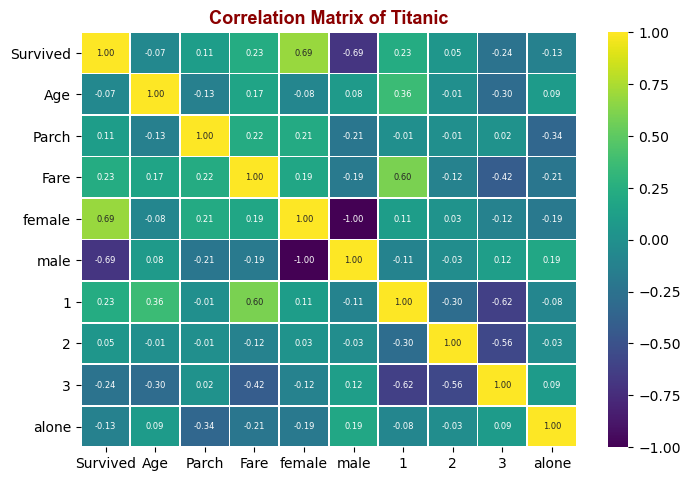

In [702]:
train_df_map=train_df.corr()
sns.heatmap(train_df_map, annot=True, fmt='.2f', annot_kws={"size": 6}, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix of Titanic", fontdict=title_font)

plt.show()